In [2]:
# define relevants paths and load functions and libraries

%run Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Analysis\\helper_functions\\functions_analysis.py

data_path = 'paper_code\\Datasets\\' # your data path
saving_path = 'paper_code\\Figures_output\\' # your saving figures path

data_path = 'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Datasets\\' 
saving_path = 'C:\\Users\\bianchg\\Documents\\GitHub\\Bianchini2025_SC\\Figures_output\\'

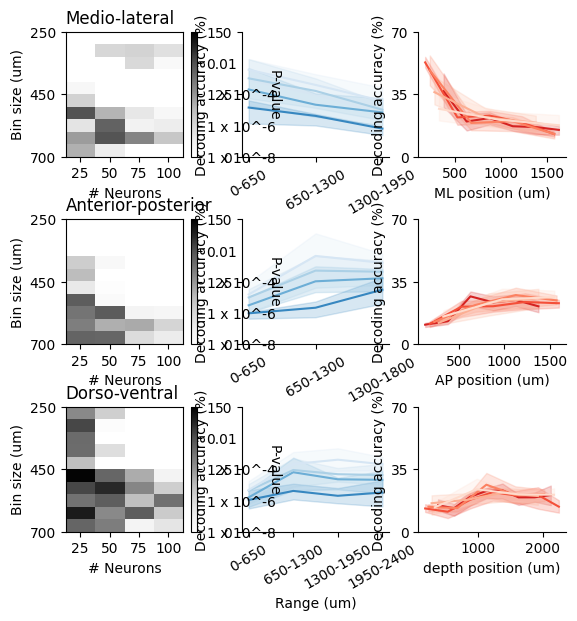

In [3]:
#plot how varying bin size and number of neurons affects accuracy in 1d decoder - Fig 8A_B_C

# load the pvalues 
load_dir = ''.join([data_path,'decoder_datasets\\pvalues_accuracy_axes_1D.npy'])
p_values = np.load(load_dir)

dims = (3, 3)
fig, axs = plt.subplots(*dims,  figsize=(5, 5))
# this is a plot with 3 subplots
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)

# subplot 1: 
# p values of significance for different bin sizes and different number of neurons
n_neurons = [25,50,75,100] 
range_length = np.arange(250,750,50)
axes = ['ML','AP','depth']
count = 0

for type_axis in axes:
    
    # subplot 1: 
    # show how statistical significance varies with # neuron numbers and bin size    
    this_p = p_values[count,:,:]
    # Set the limits for the colorbar
    vmin = 1e-8#np.min(this_p)
    vmax = 1#np.max(this_p)

    # Create a logarithmic colormap
    cmap = plt.cm.get_cmap('Greys')
    norm = LogNorm(vmin=vmin, vmax=vmax)

    # Plot the data with a logarithmic colormap
    this_ax = axs[count,0]
    if count == 0:
        this_ax.set_title('Medio-lateral',loc='left')
    elif count == 1:
        this_ax.set_title('Anterior-posterior',loc='left')
    elif count == 2:
        this_ax.set_title('Dorso-ventral',loc='left')
    im = this_ax.imshow(this_p.T, cmap=cmap, norm=norm, aspect='auto')
   
    # Add a colorbar to the plot
    cbar = plt.colorbar(im, ax=this_ax,ticks=[1e-0,1e-2,1e-4,1e-6,1e-8])
    cbar.ax.set_ylabel('P-value',rotation=-90)
    cbar.ax.set_yticklabels(['1','0.01', '1 x 10^-4','1 x 10^-6', '1 x 10^-8'])
    
    # Set the x and y axis labels
    this_ax.set_xlabel('# Neurons', fontsize=10)
    this_ax.set_ylabel('Bin size (um)', fontsize=10)

    # Set the x and y axis ticks and tick labels
    x = np.arange(4)
    y = np.arange(0,11,5)-0.5
    this_ax.set_xticks(x)
    this_ax.set_xticklabels(['25', '50', '75', '100'])
    this_ax.set_yticks(y)
    this_ax.set_yticklabels(['250', '450','700'])
    
    # subplot 2: 
    # show that varying the number of neurons for selected binsize does not change the results

    # how many neurons for the accuracy? 
    this_ax = axs[count,1]
    n_neurons = [25,50,75,100]
    this_length = 650
    n_colors = 4+1
    colors_res = sns.color_palette('Blues_r', n_colors=n_colors)
    colors_res = colors_res[1:]
    this = 0 
    max_val=[]
    for nx in range(len(n_neurons)):
        n = n_neurons[nx]
        load_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_650bins_{n}N.npy'])
        scores2 = np.load(load_dir)

        load_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_locations_650bins_{n}N.npy'])
        locs = np.load(load_dir)
        
        this_max_val= plot_scoresCLF(scores2,colors_res[this],axis=this_ax)
        max_val.append(this_max_val)

        this+=1
        x_tick_labels = [f"{locs[0][i]:.0f}-{locs[1][i]:.0f}" for i in range(len(locs[0]))]
        
        this_ax.set_ylabel('Decoding accuracy (%)', fontsize=10)
        this_ax.set_xlabel('Range (um)', fontsize=10)
        this_ax.spines['top'].set_visible(False)
        this_ax.spines['right'].set_visible(False)
        
        if type_axis == 'ML':
            this_ax.set_xticks(np.arange(0,len(x_tick_labels)-1), x_tick_labels[:-1], rotation=30)
        else:
            this_ax.set_xticks(np.arange(0,len(x_tick_labels)), x_tick_labels, rotation=30)
            
            
    # subplot 3:
    # decoding accuracy for 50 neurons and varying bin size
    this_ax = axs[count,2]
    this_n_neurons = 50
    range_length = np.arange(250,750,100)
    colors_res = sns.color_palette('Reds_r', n_colors=range_length.shape[0]+1)
    colors_res = colors_res[1:]
    this=0

    for rx in range(len(range_length)):  
        r = range_length[rx]
        load_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_{r}B_50N.npy'])
        scores = np.load(load_dir)

        load_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_locations_{r}B_50N.npy'])
        locs = np.load(load_dir)

        this_max_val= scatter_scoresCLF(locs,scores,colors_res[this],axis=this_ax)
        max_val.append(this_max_val)
        this+=1

    this_ax.set_ylabel('Decoding accuracy (%)', fontsize=10)
    this_ax.set_xlabel(f'{type_axis} position (um)', fontsize=10)
    this_ax.spines['top'].set_visible(False)
    this_ax.spines['right'].set_visible(False)
    this_ax.set_ylim([0,np.max(max_val)+1])
    axs[count,1].set_ylim([0,np.max(max_val)+1])
    count+=1
    
settings = {
    (0, 1): ([0, 0], [0, 25, 50]),
    (1, 1): ([0, 50], [0, 25, 50]),
    (2, 1): ([0, 50], [0, 25, 50]),
    (0, 2): ([0, 70], [0, 35, 70]),
    (1, 2): ([0, 70], [0, 35, 70]),
    (2, 2): ([0, 70], [0, 35, 70]),
}

# Apply settings in a single loop
for (i, j), (ylim, yticks) in settings.items():
    axs[i, j].set_ylim(ylim)
    axs[i, j].set_yticks(yticks)
    
# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure8A_B_C.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


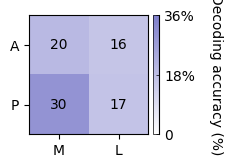

In [5]:
# plot decoder accuracy in 2D spatial bins - Fig 8D

load_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_2D.npy'])
all_scores_bins = np.load(load_dir)
scores = np.mean(all_scores_bins,axis=1)
cmap = colors.LinearSegmentedColormap.from_list('mycmap', [(1, 1, 1), '#000099'])

n_neurons = 50
n_var = 2 #dimensions

fig, axs = plt.subplots(1, 1, figsize=(1.3,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)

val_min = 0
val_max = 36
abs_max = max(abs(val_min), abs(val_max))

for t in range(n_var-1):
    which_depth = np.arange(t, scores.shape[0], n_var-1)
    curr_scores = scores[which_depth]
    this_ax = axs
    im = this_ax.imshow(curr_scores.reshape(2,-1).swapaxes(0,1), vmin=val_min, vmax=val_max, cmap=cmap,alpha = 0.5)
    this_ax.set_xticks([0, 2-1])
    this_ax.set_xticklabels(['M','L'])
    this_ax.set_yticks([0, 2-1])
    this_ax.set_yticklabels(['A','P'])

    curr_scores = np.round(curr_scores)
    this_ax.text(0, 0, f'{int(curr_scores[0])}', ha='center', va='center')
    this_ax.text(0, 1, f'{int(curr_scores[1])}', ha='center', va='center')
    this_ax.text(1, 0, f'{int(curr_scores[2])}', ha='center', va='center')
    this_ax.text(1, 1, f'{int(curr_scores[3])}', ha='center', va='center')

    divider = make_axes_locatable(this_ax)
    norm = LogNorm(vmin=0, vmax=val_max)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im,cax=cax ,ticks=[0,val_max/2, val_max], norm=norm)
    cbar.ax.set_yticklabels(['0','{:.0f}%'.format(val_max/2),'{:.0f}%'.format(val_max)])
    cbar.set_label('Decoding accuracy (%)',rotation=-90,labelpad=20)    
    cbar.ax.yaxis.set_ticks_position('right')
    cbar.ax.yaxis.set_label_position('right')
    cbar.ax.spines['right'].set_visible(True)
    cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both')
    cbar.outline.set_linewidth(0.5)
this_ax.set_aspect('equal')

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure8D.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


2.1258583039436585e-07
          1             2             3             4
1  1.000000  4.820763e-04  9.416638e-02  1.589959e-01
2  0.000482  1.000000e+00  2.412876e-07  9.633570e-07
3  0.094166  2.412876e-07  1.000000e+00  7.907311e-01
4  0.158996  9.633570e-07  7.907311e-01  1.000000e+00


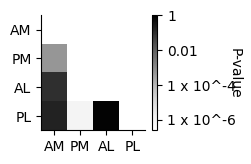

In [6]:
# Dunn’s post-hoc test corrected P-values for 2D classifier - Fig 8E

load_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_2D.npy'])
all_scores_bins = np.load(load_dir)

scores = np.mean(all_scores_bins,axis=1)

# Create a corresponding array of group labels

stat, all_p = kruskal_test(*all_scores_bins)
print(all_p)
from scikit_posthocs import posthoc_dunn
dunn_results = posthoc_dunn(all_scores_bins)
print(dunn_results)

to_plot = dunn_results
# Mask the upper triangular portion (including the diagonal)
mask = np.tri(to_plot.shape[0], k=-1, dtype=bool)
# Apply the mask to the array
masked_arr = np.ma.array(to_plot , mask=~mask)

num_groups = 4
label_groups = ['AM','PM','AL','PL']

fig, this_ax = plt.subplots(figsize=(1.3,1.15))#,constrained_layout=True)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)

v_min =np.min(np.array(dunn_results))#0
v_max = 1

# Apply symmetric logarithmic normalization to the data
norm = LogNorm(vmin=v_min, vmax=v_max)
this_cmap = 'Greys'

im = this_ax.imshow(masked_arr ,aspect="auto",cmap=this_cmap,norm=norm)

# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=this_ax,ticks=[1e-0,1e-2,1e-4,1e-6])
cbar.ax.set_ylabel('P-value',rotation=-90)
cbar.ax.set_yticklabels(['1','0.01', '1 x 10^-4','1 x 10^-6'])
# Set the limits of the colorbar
cbar.set_ticks([1e-0, 1e-2, 1e-4, 1e-6])
cbar.set_ticklabels(['1', '0.01', '1 x 10^-4', '1 x 10^-6'])
# Set tick labels
this_ax.set_xticks(np.arange(num_groups))
this_ax.set_yticks(np.arange(num_groups))
this_ax.set_xticklabels(label_groups,fontsize=10)
this_ax.set_yticklabels(label_groups,fontsize=10)

this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure8E.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


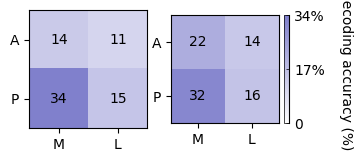

In [7]:
# plot decoder accuracy in 3D spatial bins - Fig 8F

load_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_3D.npy'])
scores = np.load(load_dir)
cmap = colors.LinearSegmentedColormap.from_list('mycmap', [(1, 1, 1), '#000099'])

n_neurons = 50
n_var = 3 #dimensions

fig, axs = plt.subplots(1, 2, figsize=(2.6,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)

# set up the first subplot which show the mean accuracy in the considered bins
# set the maximum for the plot
val_min = 0
val_max = np.max(scores)
abs_max = max(abs(val_min), abs(val_max))

# Create a new colormap with zero shifted to white
# here I will make a colormap of blues

for t in range(n_var-1):
    which_depth = np.arange(t, scores.shape[0], n_var-1)
    curr_scores = scores[which_depth]
    if t == 0:
        this_ax = axs[0]
    else:
        this_ax = axs[1]
    im = this_ax.imshow(curr_scores.reshape(2,-1).swapaxes(0,1), vmin=val_min, vmax=val_max, cmap=cmap,alpha = 0.5)
    this_ax.set_xticks([0, 2-1])
    this_ax.set_xticklabels(['M','L'])
    this_ax.set_yticks([0, 2-1])
    this_ax.set_yticklabels(['A','P'])

    curr_scores = np.round(curr_scores)
    this_ax.text(0, 0, f'{int(curr_scores[0])}', ha='center', va='center')
    this_ax.text(0, 1, f'{int(curr_scores[1])}', ha='center', va='center')
    this_ax.text(1, 0, f'{int(curr_scores[2])}', ha='center', va='center')
    this_ax.text(1, 1, f'{int(curr_scores[3])}', ha='center', va='center')
    
    if t == 1:
        divider = make_axes_locatable(this_ax)
        norm = LogNorm(vmin=0, vmax=val_max)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        #cbar = plt.colorbar(im,cax=cax ,ticks=[0, val_max/2, val_max], norm=norm)
        cbar = plt.colorbar(im,cax=cax ,ticks=[0,val_max/2, val_max], norm=norm)
        cbar.set_label('Decoding accuracy (%)',rotation=-90,labelpad=20)
        cbar.ax.set_yticklabels(['0','{:.0f}%'.format(val_max/2),'{:.0f}%'.format(val_max)])
        cbar.ax.yaxis.set_ticks_position('right')
        cbar.ax.yaxis.set_label_position('right')
        cbar.ax.spines['right'].set_visible(True)
        cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both')
        cbar.outline.set_linewidth(0.5)
this_ax.set_aspect('equal')

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure8F.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)
